<a href="https://colab.research.google.com/github/katsukiyamamoto/EU_M_Math/blob/main/Chap03_Cm_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine_data = wine.describe()
wine_data.to_csv('wine_data.csv')

In [5]:
import seaborn as sns

sns.pairplot(wine_data)

Error in callback <function flush_figures at 0x79e519c30280> (for post_execute):


KeyboardInterrupt: 

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
student_data_math = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-mat.csv',sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


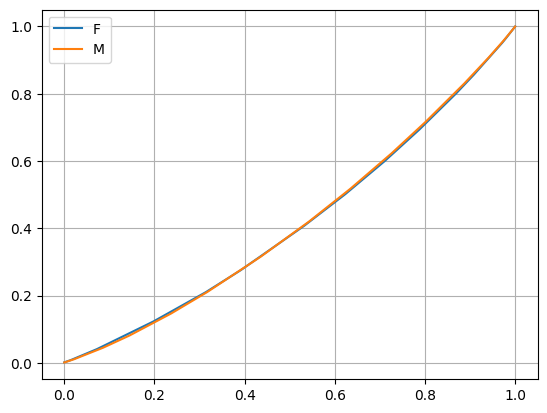

In [12]:
import matplotlib.pyplot as plt
import numpy as np


student_data_math_F = student_data_math[student_data_math.sex == 'F']
student_data_math_M = student_data_math[student_data_math.sex == 'M']

sorted_G1_F = student_data_math_F.G1.sort_values()
sorted_G1_M = student_data_math_M.G1.sort_values()

len_F = np.arange(len(sorted_G1_F))
len_M = np.arange(len(sorted_G1_M))

plt.plot(len_F/len_F.max(), sorted_G1_F.cumsum()/sorted_G1_F.sum(), label='F')
plt.plot(len_M/len_M.max(), sorted_G1_M.cumsum()/sorted_G1_M.sum(), label='M')

plt.legend()
plt.grid(True)

In [13]:
def heikin(data):
  sub = []
  for i in range(0, len(data)-1):
    for j in range(i+1, len(data)):
      sub.append(np.abs(data[i] - data[j]))
  return float(sum(sub))*2 / (len(data)**2)

def gin(heikin, data):
  return heikin / (2*np.mean(data))

print('女ジニ係数:', gin(heikin(np.array(sorted_G1_F)), np.array(sorted_G1_F)))
print('男ジニ係数:', gin(heikin(np.array(sorted_G1_M)), np.array(sorted_G1_M)))

女ジニ係数: 0.1723782950865341
男ジニ係数: 0.17197351667939903
